In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from pprint import pprint

from astropy import units as u
from astropy.modeling.blackbody import blackbody_lambda, blackbody_nu

In [2]:
df = pd.read_csv('mdwarf_rematch_readin.csv',low_memory=False)

df
        

,Name,RA,DEC,MatchID,MatchRA,MatchDEC,dstArcSec,designation,ZooniverseID,goodFraction,...,T_e_pmRA,T_pmDEC,T_e_pmDEC,T_PMflag,T_plx,T_e_plx,T_PARflag,T_dstArcSec,T_contamination,ZooniverseURL
0,AWI0003q1o,230.520375,-59.984778,179191,230.520376,-59.984778,0.002482,J152204.89-595905.2,AWI0003q1o,0.533333,...,4.50000,14.90000,3.70000,ucac4,NaN,NaN,NaN,14.669987,0.0,https://talk.diskdetective.org/#/subjects/AWI0...
1,AWI00037bl,230.520750,-58.254667,119349,230.520751,-58.254667,0.003497,J152204.98-581516.8,AWI00037bl,0.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://talk.diskdetective.org/#/subjects/AWI0...
2,AWI0005yxk,156.364542,-84.746611,354832,156.364550,-84.746612,0.004825,J102527.49-844447.8,AWI0005yxk,0.533333,...,3.30000,6.20000,1.60000,ucac4,NaN,NaN,NaN,0.152052,0.0,https://talk.diskdetective.org/#/subjects/AWI0...
3,AWI00011ai,203.227333,-61.065167,23302,203.227336,-61.065167,0.005363,J133254.56-610354.6,AWI00011ai,0.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://talk.diskdetective.org/#/subjects/AWI0...
4,AWI0006485,237.792417,-72.437667,308215,237.792420,-72.437668,0.005753,J155110.18-722615.6,AWI0006485,0.666667,...,8.10000,-3.90000,3.70000,ucac4,NaN,NaN,NaN,0.084769,1.0,https://talk.diskdetective.org/#/subjects/AWI0...
5,AWI0003thg,264.661583,-35.241556,188739,264.661585,-35.241557,0.006755,J173838.78-351429.6,AWI0003thg,0.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://talk.diskdetective.org/#/subjects/AWI0...
6,AWI00023l4,10.390042,66.883000,83443,10.390043,66.883002,0.006833,J004133.61+665258.8,AWI00023l4,0.800000,...,5.80000,-7.60000,5.70000,ucac4,NaN,NaN,NaN,0.230260,0.0,https://talk.diskdetective.org/#/subjects/AWI0...
7,AWI0002amq,276.164833,-2.555750,70082,276.164834,-2.555752,0.006921,J182439.56-023320.7,AWI0002amq,0.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://talk.diskdetective.org/#/subjects/AWI0...
8,AWI0005kzt,274.828708,-0.306111,329376,274.828709,-0.306113,0.007339,J181918.89-001822.0,AWI0005kzt,0.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://talk.diskdetective.org/#/subjects/AWI0...
9,AWI0002owg,16.813750,62.783056,102028,16.813755,62.783056,0.007920,J010715.30+624659.0,AWI0002owg,0.785714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://talk.diskdetective.org/#/subjects/AWI0...


In [3]:
df.columns

Index([u'Name', u'RA', u'DEC', u'MatchID', u'MatchRA', u'MatchDEC',
       u'dstArcSec', u'designation', u'ZooniverseID', u'goodFraction', u'glon',
       u'glat', u'w1mpro', u'w1sigmpro', u'w2mpro', u'w2sigmpro', u'w3mpro',
       u'w3sigmpro', u'w4mpro', u'w4sigmpro', u'j_m_2mass', u'j_msig_2mass',
       u'h_m_2mass', u'h_msig_2mass', u'k_m_2mass', u'k_msig_2mass', u'j_h',
       u'h_k', u'A_Vmag', u'A_B_V', u'A_Bmag', u'A_gMag', u'A_rMag', u'A_iMag',
       u'A_Verr', u'A_B_Verr', u'A_Berr', u'A_gErr', u'A_rErr', u'A_iErr',
       u'A_objid', u'A_dstArcSec', u'A_contamination', u'G_source_id',
       u'G_phot_g_mean_mag', u'G_parallax', u'G_parallax_error', u'G_pmra',
       u'G_pmra_error', u'G_pmdec', u'G_pmdec_error',
       u'G_astrometric_n_good_obs_al', u'G_astrometric_chi2_al',
       u'G_visibility_periods_used', u'G_phot_g_mean_flux_over_error',
       u'G_phot_g_mean_mag1', u'G_phot_bp_mean_flux_over_error',
       u'G_phot_bp_mean_mag', u'G_phot_rp_mean_flux_over_error',

In [4]:
df.shape

(1508, 91)

In [5]:
count_good_matches = len([x for x in df[u'G_dstArcSec'] if x <=3.])
count_distant_matches = len([x for x in df[u'G_dstArcSec'] if x<=12.]) - count_good_matches
count_no_matches = 1508 - count_good_matches - count_distant_matches

print count_good_matches, count_distant_matches, count_no_matches

print df[u'G_dstArcSec']

1508 0 0
0       0.030448
1       0.149198
2       0.032270
3       0.075221
4       0.064503
5       0.110692
6       0.114591
7       0.084682
8       0.081281
9       0.046797
10      0.055898
11      0.069944
12      0.134401
13      0.117830
14      0.077906
15      0.054126
16      0.053789
17      0.011917
18      0.117719
19      0.074978
20      0.056940
21      0.036102
22      0.067553
23      0.035740
24      0.059635
25      0.101345
26      0.263657
27      0.051479
28      0.041724
29      0.065952
          ...   
1478    0.081819
1479    0.046530
1480    0.108780
1481    0.035483
1482    0.068920
1483    0.127674
1484    0.029948
1485    0.092900
1486    0.075726
1487    0.064565
1488    0.030591
1489    0.001929
1490    0.018665
1491    0.078086
1492    0.078072
1493    0.018552
1494    0.076107
1495    0.143378
1496    0.112454
1497    0.038388
1498    0.067086
1499    0.051836
1500    0.073225
1501    0.074100
1502    0.183607
1503    0.051883
1504    0.021980
1505 

In [6]:
df = df.assign(G_parallax_over_error = pd.Series(df[u'G_parallax']/df[u'G_parallax_error']).values)

df.columns
    
df[u'G_parallax_over_error']

0        1.686519
1       -0.528197
2        3.040031
3        3.292935
4        3.232097
5        1.021477
6        6.279163
7        0.724357
8        0.569455
9        3.754927
10       1.863668
11       1.041616
12      -0.268704
13      -0.842205
14       2.290378
15       3.744923
16       0.620610
17      -0.221050
18       4.082954
19       1.073024
20       0.635372
21      -0.462891
22       2.270293
23      -0.396700
24       3.222972
25       0.095979
26       2.090387
27      -1.802635
28      -0.575323
29       1.048146
          ...    
1478     1.732626
1479    -0.168856
1480     3.770123
1481     1.543186
1482     3.586881
1483     2.202468
1484    -0.664157
1485     0.195685
1486     4.863333
1487     1.174787
1488     1.292047
1489     0.634693
1490     3.090569
1491     2.164975
1492    -1.788605
1493     0.156742
1494    -1.179176
1495    -3.899975
1496     0.908713
1497     0.507308
1498     3.201003
1499     0.396991
1500    -0.363807
1501    13.620369
1502     1

256
470
4
778


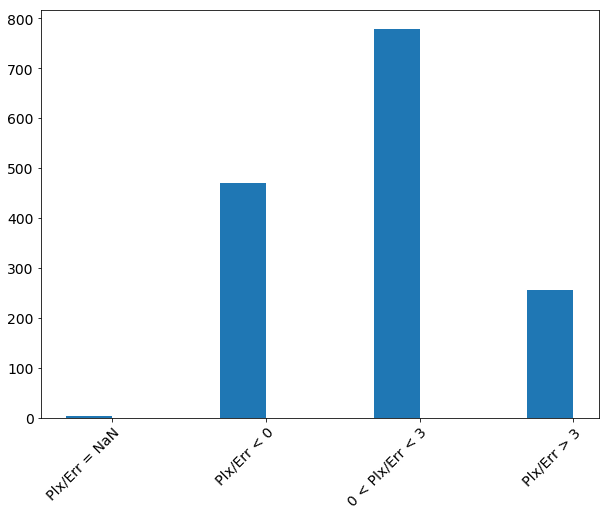

In [7]:
good_parallax_count = len([x for x in df[u'G_parallax_over_error'] if x >= 3.])
negative_parallax_count = len([x for x in df[u'G_parallax_over_error'] if x < 0.])
nan_parallax_count = len([x for x in df[u'G_parallax_over_error'] if math.isnan(x)])

everything_else = 1508 - good_parallax_count - negative_parallax_count - nan_parallax_count

print good_parallax_count
print negative_parallax_count
print nan_parallax_count
print everything_else

#print min(df[u'G_parallax_over_error'])
#print max(df[u'G_parallax_over_error'])

width=0.3
bins = map(lambda x: x-width/2,range(1,5))

plt.figure(figsize=(10.,7.5))
plt.bar(bins, [4,470,778,256], width=width)

names=['Plx/Err = NaN', 'Plx/Err < 0','0 < Plx/Err < 3','Plx/Err > 3']

plt.xticks(map(lambda x: x, range(1,4+1)))
plt.gca().set_xticklabels(names,rotation=45,rotation_mode='anchor', ha='right',fontsize=14)
plt.yticks(fontsize=14)
plt.show()

256
7


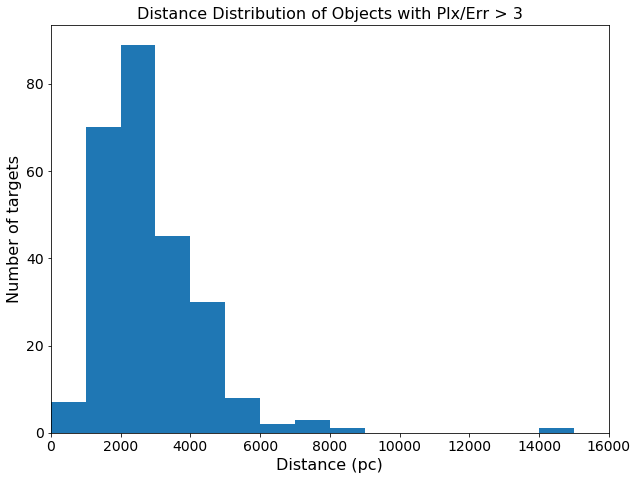

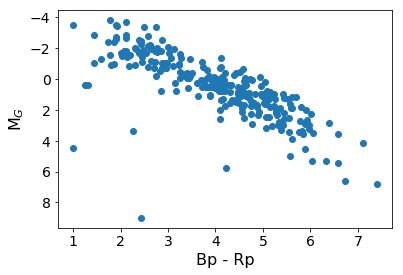

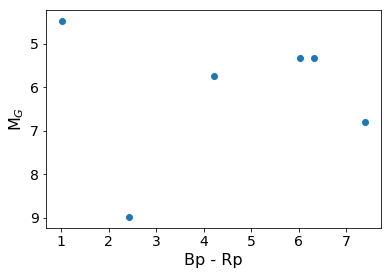

In [8]:
df = df.assign(G_distance = pd.Series(1000./df[u'G_parallax']).values)
df = df.assign(G_distance_error = pd.Series((df[u'G_parallax_error']/df[u'G_parallax']) * df[u'G_distance']))

#df = df.assign(G_distmod = pd.Series((5.*np.log10(df[u'G_distance']) - 5.)))

#df = df.assign(G_M_phot_g = pd.Series(df[u'G_phot_g_mean_mag'] - df[u'G_distmod']))

#df = df.assign(G_phot_g_min_phot_rp = pd.Series(df[u'G_phot_g_mean_mag'] - df[u'G_phot_rp_mean_mag']))
#df = df.assign(G_phot_bp_min_phot_rp = pd.Series(df[u'G_phot_bp_mean_mag'] - df[u'G_phot_rp_mean_mag']))

distance_use = np.array([df[u'G_distance'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.])
Gmag = np.array([df[u'G_phot_g_mean_mag'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.])
bpmag = np.array([df[u'G_phot_bp_mean_mag'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.])
rpmag = np.array([df[u'G_phot_rp_mean_mag'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.])

distance_modulus = 5.*np.log10(distance_use) - 5.

print distance_use.size


distance_use_nearby = np.array([df[u'G_distance'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3. and df[u'G_parallax'][i] > 1.])
Gmag_nearby = np.array([df[u'G_phot_g_mean_mag'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3. and df[u'G_parallax'][i] > 1.])
bpmag_nearby = np.array([df[u'G_phot_bp_mean_mag'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3. and df[u'G_parallax'][i] > 1.])
rpmag_nearby = np.array([df[u'G_phot_rp_mean_mag'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3. and df[u'G_parallax'][i] > 1.])

distance_modulus_nearby = 5.*np.log10(distance_use_nearby) - 5.

print distance_use_nearby.size

M_G = Gmag - distance_modulus
bp_rp = bpmag - rpmag


M_G_nearby = Gmag_nearby - distance_modulus_nearby
bp_rp_nearby = bpmag_nearby - rpmag_nearby

source_ids_of_interest = [df[u'G_source_id'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.]

f = open('gaia_source_ids_to_pull.dat','w')

for x in source_ids_of_interest:
    f.write(str(x) + '\n')
    
f.close()

distances_for_plotting = np.array([df[u'G_distance'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.])

plt.figure(figsize=(10.,7.5))
plt.hist(distances_for_plotting,bins=np.linspace(0.,16000.,17))
plt.xlabel('Distance (pc)',fontsize=16)
plt.ylabel('Number of targets',fontsize=16)
plt.xlim([0.,16000.])
plt.title('Distance Distribution of Objects with Plx/Err > 3',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



#M_G_use = np.array([df[u'G_M_phot_g'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.])
#g_min_rp_use = np.array([df[u'G_phot_g_min_phot_rp'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.])
#bp_min_rp_use = np.array([df[u'G_phot_bp_min_phot_rp'][i] for i in range(1508) if df[u'G_parallax_over_error'][i] >= 3.])

#plt.figure()
#plt.scatter(bp_, M_G_use)
#plt.gca().invert_yaxis()
#plt.show()

plt.figure()
plt.scatter(bp_rp, M_G)
plt.gca().invert_yaxis()
plt.xlabel('Bp - Rp',fontsize=16)
plt.ylabel(r'M$_{G}$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#print max(df[u'G_parallax'])
#print min(df[u'G_distmod'])


plt.figure()
plt.scatter(bp_rp_nearby, M_G_nearby)
plt.gca().invert_yaxis()
plt.xlabel('Bp - Rp',fontsize=16)
plt.ylabel(r'M$_{G}$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#print max(df[u'G_parallax'])
#print min(df[u'G_distmod'])

In [9]:
df1 = pd.read_csv('gaia_pull_for_mdwarfs_readin.csv',low_memory=False)

pprint(df1.columns)

Index([u'designation', u'ZooniverseID', u'SciTeamFollowUp', u'SciTeamComment',
       u'goodFraction', u'classifiers', u'good', u'multi', u'oval', u'empty',
       ...
       u'T_e_pmDEC', u'T_PMflag', u'T_plx', u'T_e_plx', u'T_PARflag',
       u'T_dstArcSec', u'T_contamination', u'fileNPath', u'objid',
       u'ZooniverseURL'],
      dtype='object', length=111)


5653
5653
5653


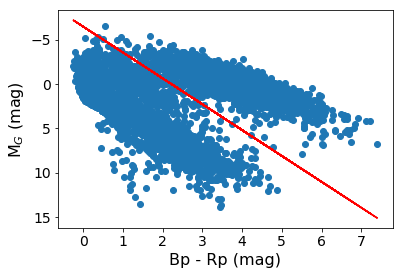

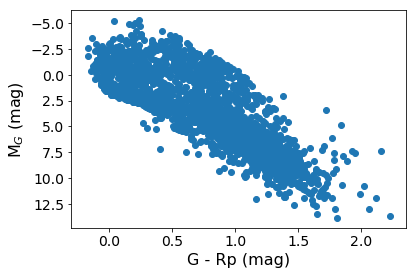

413


In [10]:
G_mag = np.array(df1[u'G_phot_g_mean_mag'])
bp_mag = np.array(df1[u'G_phot_bp_mean_mag'])
rp_mag = np.array(df1[u'G_phot_rp_mean_mag'])
#w1mag = np.array(df1[u'w1mag'])
#w4mag = np.array(df1[u'w4mag'])
wiseids = np.array(df1[u'designation'])

print G_mag.size
print bp_mag.size
print rp_mag.size

G_parallax = np.array(df1[u'G_parallax'])
G_distance = 1000./G_parallax

G_distmod = (5.*np.log10(G_distance)) - 5.

M_G_mag = G_mag - G_distmod

plt.figure()
plt.scatter(bp_mag - rp_mag, M_G_mag)
plt.gca().invert_yaxis()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Bp - Rp (mag)',fontsize=16)
plt.ylabel(r'M$_{G}$ (mag)',fontsize=16)

bound_slope = 17.5/6.

bound_line = (17.5/6.)*((bp_mag - rp_mag) - 6.5) + 12.5

#plt.plot([0.5, 6.5],[-5.,12.5],'r')
plt.plot((bp_mag - rp_mag), bound_line,'r')
plt.show()

main_sequence_Gmag = np.array([G_mag[i] for i in range(G_mag.size) if (M_G_mag[i] > ((17.5/6.)*((bp_mag[i] - rp_mag[i]) - 6.5) + 12.5))])
main_sequence_bpmag = np.array([bp_mag[i] for i in range(G_mag.size) if (M_G_mag[i] > ((17.5/6.)*((bp_mag[i] - rp_mag[i]) - 6.5) + 12.5))])
main_sequence_rpmag = np.array([rp_mag[i] for i in range(G_mag.size) if (M_G_mag[i] > ((17.5/6.)*((bp_mag[i] - rp_mag[i]) - 6.5) + 12.5))])
main_sequence_M_G_mag = np.array([M_G_mag[i] for i in range(G_mag.size) if (M_G_mag[i] > ((17.5/6.)*((bp_mag[i] - rp_mag[i]) - 6.5) + 12.5))])
main_sequence_wiseids = np.array([wiseids[i] for i in range(G_mag.size) if (M_G_mag[i] > ((17.5/6.)*((bp_mag[i] - rp_mag[i]) - 6.5) + 12.5))])


plt.figure()
plt.scatter(main_sequence_Gmag - main_sequence_rpmag, main_sequence_M_G_mag)
plt.gca().invert_yaxis()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('G - Rp (mag)',fontsize=16)
plt.ylabel(r'M$_{G}$ (mag)',fontsize=16)
plt.show()


likely_mdwarfs_M_G_mag = np.array([main_sequence_M_G_mag[i] for i in range(main_sequence_M_G_mag.size) if main_sequence_M_G_mag[i] > 7.5])
likely_mdwarfs_Gmag = np.array([main_sequence_Gmag[i] for i in range(main_sequence_M_G_mag.size) if main_sequence_M_G_mag[i] > 7.5])
likely_mdwarfs_bpmag = np.array([main_sequence_bpmag[i] for i in range(main_sequence_M_G_mag.size) if main_sequence_M_G_mag[i] > 7.5])
likely_mdwarfs_rpmag = np.array([main_sequence_rpmag[i] for i in range(main_sequence_M_G_mag.size) if main_sequence_M_G_mag[i] > 7.5])
likely_mdwarfs_wiseids = np.array([main_sequence_wiseids[i] for i in range(main_sequence_M_G_mag.size) if main_sequence_M_G_mag[i] > 7.5])

print likely_mdwarfs_wiseids.size


In [12]:
likely_mdwarfs_w1mag = np.array([df1[u'w1mpro'][i] for i in range(G_mag.size) if df1[u'designation'][i] in likely_mdwarfs_wiseids])
likely_mdwarfs_w1err = np.array([df1[u'w1sigmpro'][i] for i in range(G_mag.size) if df1[u'designation'][i] in likely_mdwarfs_wiseids])
likely_mdwarfs_w4mag = np.array([df1[u'w4mpro'][i] for i in range(G_mag.size) if df1[u'designation'][i] in likely_mdwarfs_wiseids])
likely_mdwarfs_w4err = np.array([df1[u'w4sigmpro'][i] for i in range(G_mag.size) if df1[u'designation'][i] in likely_mdwarfs_wiseids])

likely_mdwarfs_w1minw4 = likely_mdwarfs_w1mag - likely_mdwarfs_w4mag
likely_mdwarfs_w1minw4_unc = np.sqrt((likely_mdwarfs_w1err**2) + (likely_mdwarfs_w4err**2))

meets_original_m_criteria = len([likely_mdwarfs_w1minw4[i] for i in range(likely_mdwarfs_w1minw4.size) if ((likely_mdwarfs_w1minw4[i] > 0.9) and (likely_mdwarfs_w1minw4[i]/likely_mdwarfs_w1minw4_unc[i] > 5.))])
likely_yso = len([likely_mdwarfs_w1minw4[i] for i in range(likely_mdwarfs_w1minw4.size) if ((likely_mdwarfs_w1minw4[i] > 2.5) and (likely_mdwarfs_w1minw4[i]/likely_mdwarfs_w1minw4_unc[i] > 5.))])
possible_debris = len([likely_mdwarfs_w1minw4[i] for i in range(likely_mdwarfs_w1minw4.size) if ((likely_mdwarfs_w1minw4[i] < 2.5) and (likely_mdwarfs_w1minw4[i]/likely_mdwarfs_w1minw4_unc[i] > 5.))])
meets_gj1243_criteria = len([likely_mdwarfs_w1minw4[i] for i in range(likely_mdwarfs_w1minw4.size) if ((likely_mdwarfs_w1minw4[i] > 0.795) and (likely_mdwarfs_w1minw4[i]/likely_mdwarfs_w1minw4_unc[i] > 5.))])
meets_binks_jeffries_criterion = len([likely_mdwarfs_w1minw4[i] for i in range(likely_mdwarfs_w1minw4.size) if ((likely_mdwarfs_w1minw4[i] < 1.) and (likely_mdwarfs_w1minw4[i]/likely_mdwarfs_w1minw4_unc[i] > 5.))])


print meets_original_m_criteria
print likely_yso
print possible_debris
print meets_gj1243_criteria
print meets_binks_jeffries_criterion

409
408
5
409
4


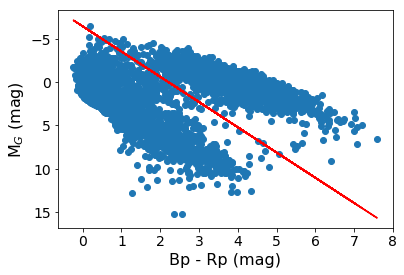

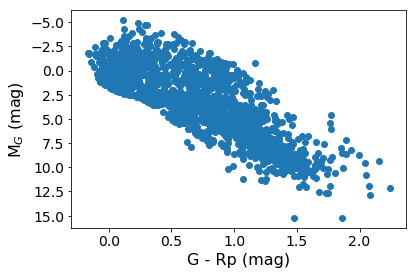

# Objects in set: 283
Number that meet W1-W4>0.9 criterion: 277
Number that meet W1-W4>2.5 criterion: 273
Number that meet GJ 1243-based W1-W4 criterion: 277


In [55]:
df2 = pd.read_csv('mdwarfs_search_from_gaia_and_ml_readin.csv',low_memory=False)

G_mag_ml = np.array(df2[u'G_phot_g_mean_mag'])
bp_mag_ml = np.array(df2[u'G_phot_bp_mean_mag'])
rp_mag_ml = np.array(df2[u'G_phot_rp_mean_mag'])
#w1mag = np.array(df1[u'w1mag'])
#w4mag = np.array(df1[u'w4mag'])
wiseids_ml = np.array(df2[u'designation'])

#print G_mag_ml.size
#print bp_mag_ml.size
#print rp_mag_ml.size

G_parallax_ml = np.array(df2[u'G_parallax'])
G_distance_ml = 1000./G_parallax_ml

G_distmod_ml = (5.*np.log10(G_distance_ml)) - 5.

M_G_mag_ml = G_mag_ml - G_distmod_ml

plt.figure()
plt.scatter(bp_mag_ml - rp_mag_ml, M_G_mag_ml)
plt.gca().invert_yaxis()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Bp - Rp (mag)',fontsize=16)
plt.ylabel(r'M$_{G}$ (mag)',fontsize=16)

bound_slope_ml = 17.5/6.

bound_line_ml = (17.5/6.)*((bp_mag_ml - rp_mag_ml) - 6.5) + 12.5

#plt.plot([0.5, 6.5],[-5.,12.5],'r')
plt.plot((bp_mag_ml - rp_mag_ml), bound_line_ml,'r')
plt.show()

main_sequence_Gmag_ml = np.array([G_mag_ml[i] for i in range(G_mag_ml.size) if (M_G_mag_ml[i] > ((17.5/6.)*((bp_mag_ml[i] - rp_mag_ml[i]) - 6.5) + 12.5))])
main_sequence_bpmag_ml = np.array([bp_mag_ml[i] for i in range(G_mag_ml.size) if (M_G_mag_ml[i] > ((17.5/6.)*((bp_mag_ml[i] - rp_mag_ml[i]) - 6.5) + 12.5))])
main_sequence_rpmag_ml = np.array([rp_mag_ml[i] for i in range(G_mag_ml.size) if (M_G_mag_ml[i] > ((17.5/6.)*((bp_mag_ml[i] - rp_mag_ml[i]) - 6.5) + 12.5))])
main_sequence_M_G_mag_ml = np.array([M_G_mag_ml[i] for i in range(G_mag_ml.size) if (M_G_mag_ml[i] > ((17.5/6.)*((bp_mag_ml[i] - rp_mag_ml[i]) - 6.5) + 12.5))])
main_sequence_wiseids_ml = np.array([wiseids_ml[i] for i in range(G_mag_ml.size) if (M_G_mag_ml[i] > ((17.5/6.)*((bp_mag_ml[i] - rp_mag_ml[i]) - 6.5) + 12.5))])


plt.figure()
plt.scatter(main_sequence_Gmag_ml - main_sequence_rpmag_ml, main_sequence_M_G_mag_ml)
plt.gca().invert_yaxis()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('G - Rp (mag)',fontsize=16)
plt.ylabel(r'M$_{G}$ (mag)',fontsize=16)
plt.show()


likely_mdwarfs_M_G_mag_ml = np.array([main_sequence_M_G_mag_ml[i] for i in range(main_sequence_M_G_mag_ml.size) if main_sequence_M_G_mag_ml[i] > 7.5])
likely_mdwarfs_Gmag_ml = np.array([main_sequence_Gmag_ml[i] for i in range(main_sequence_M_G_mag_ml.size) if main_sequence_M_G_mag_ml[i] > 7.5])
likely_mdwarfs_bpmag_ml = np.array([main_sequence_bpmag_ml[i] for i in range(main_sequence_M_G_mag_ml.size) if main_sequence_M_G_mag_ml[i] > 7.5])
likely_mdwarfs_rpmag_ml = np.array([main_sequence_rpmag_ml[i] for i in range(main_sequence_M_G_mag_ml.size) if main_sequence_M_G_mag_ml[i] > 7.5])
likely_mdwarfs_wiseids_ml = np.array([main_sequence_wiseids_ml[i] for i in range(main_sequence_M_G_mag_ml.size) if main_sequence_M_G_mag_ml[i] > 7.5])

print '# Objects in set:', likely_mdwarfs_wiseids_ml.size


likely_mdwarfs_ml_w1mag = np.array([df2[u'w1mpro'][i] for i in range(G_mag_ml.size) if df2[u'designation'][i] in likely_mdwarfs_wiseids_ml])
likely_mdwarfs_ml_w1err = np.array([df2[u'w1sigmpro'][i] for i in range(G_mag_ml.size) if df2[u'designation'][i] in likely_mdwarfs_wiseids_ml])
likely_mdwarfs_ml_w4mag = np.array([df2[u'w4mpro'][i] for i in range(G_mag_ml.size) if df2[u'designation'][i] in likely_mdwarfs_wiseids_ml])
likely_mdwarfs_ml_w4err = np.array([df2[u'w4sigmpro'][i] for i in range(G_mag_ml.size) if df2[u'designation'][i] in likely_mdwarfs_wiseids_ml])

likely_mdwarfs_ml_w1minw4 = likely_mdwarfs_ml_w1mag - likely_mdwarfs_ml_w4mag
likely_mdwarfs_ml_w1minw4_unc = np.sqrt((likely_mdwarfs_ml_w1err**2) + (likely_mdwarfs_ml_w4err**2))

meets_original_m_criteria_ml = len([likely_mdwarfs_ml_w1minw4[i] for i in range(likely_mdwarfs_ml_w1minw4.size) if ((likely_mdwarfs_ml_w1minw4[i] > 0.9) and (likely_mdwarfs_ml_w1minw4[i]/likely_mdwarfs_ml_w1minw4_unc[i] > 5.))])
likely_yso_ml = len([likely_mdwarfs_ml_w1minw4[i] for i in range(likely_mdwarfs_ml_w1minw4.size) if ((likely_mdwarfs_ml_w1minw4[i] > 2.5) and (likely_mdwarfs_ml_w1minw4[i]/likely_mdwarfs_ml_w1minw4_unc[i] > 5.))])
meets_gj1243_criteria_ml = len([likely_mdwarfs_ml_w1minw4[i] for i in range(likely_mdwarfs_ml_w1minw4.size) if ((likely_mdwarfs_ml_w1minw4[i] > 0.795) and (likely_mdwarfs_ml_w1minw4[i]/likely_mdwarfs_ml_w1minw4_unc[i] > 5.))])

print 'Number that meet W1-W4>0.9 criterion:', meets_original_m_criteria_ml
print 'Number that meet W1-W4>2.5 criterion:', likely_yso_ml
print 'Number that meet GJ 1243-based W1-W4 criterion:', meets_gj1243_criteria_ml


In [38]:
test_rstar = 0.30 * 695700000.
test_dstar = (1000./9.860) * 30856775814913700.

test_rdstar2 = (test_rstar/test_dstar)**2

test_tdisk = 132.
test_tstar = 3050.

test_trat4 = (test_tdisk/test_tstar)**4

desired_lir_lstar = 0.07

desired_xdisk = 0.07 / test_trat4 * test_rdstar2

bb_energy = blackbody_lambda([2200000.*u.AA],132.*u.K) * np.pi * u.sr
print bb_energy

bb_energy_Jy = bb_energy * (0.001 * u.cm * u.cm * u.s / u.erg) * 220000. / (299792458./0.000022) * u.AA * (1.0e26) * desired_xdisk
print bb_energy_Jy[0]

[ 0.00011323] erg / (Angstrom cm2 s)
1.62223875475e-05


In [36]:
test_rdstar = (test_rstar/test_dstar)

test_md = -39.234 - (5.*np.log10(test_rdstar))

print test_md

11.645651861


In [39]:
test_fd = 8.363 * (10**(-0.4*test_md))

print test_fd

result = test_fd + bb_energy_Jy[0]

print result

result_md = -2.5*(np.log10(result/8.363))

print result_md

test_md1 = -38.743 - (5.*np.log10(test_rdstar))
print test_md1 - result_md

0.000183696699086
0.000199919086633
11.5537695945
0.582882266481
